# 异常检测

统计方法检测到 20 个异常
机器学习方法检测到 50 个异常


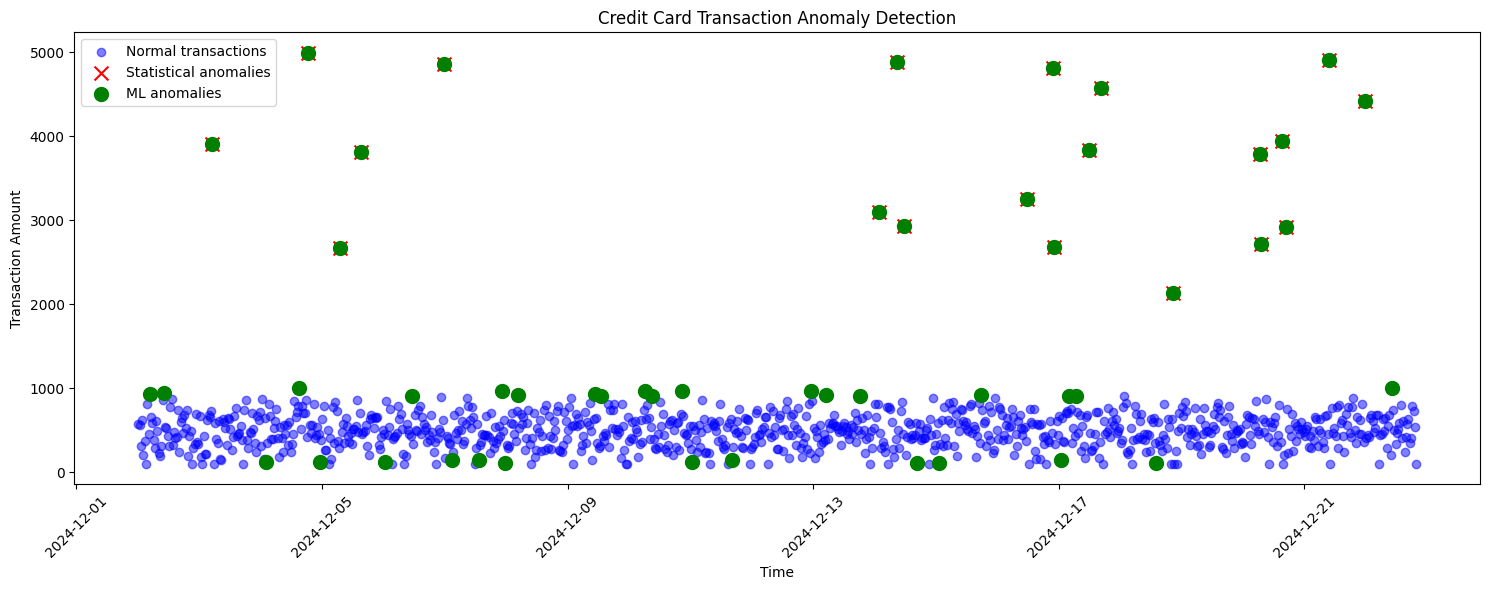

In [6]:
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def generate_sample_data(n_samples=1000):
    """
    生成模拟的信用卡交易数据
    返回: 交易金额和时间
    """
    # 生成正常交易数据 - 大部分金额在100-1000之间
    normal_amounts = np.random.normal(500, 200, n_samples)
    normal_amounts = np.clip(normal_amounts, 100, 1000)
    
    # 添加一些异常值 - 非常大的交易金额
    anomaly_indices = np.random.choice(n_samples, size=int(n_samples * 0.02), replace=False)
    normal_amounts[anomaly_indices] = np.random.uniform(2000, 5000, size=len(anomaly_indices))
    
    # 生成时间序列数据
    base_time = datetime.now()
    times = [base_time + timedelta(minutes=i*30) for i in range(n_samples)]
    
    return normal_amounts, times

def statistical_anomaly_detection(data, threshold=3):
    """
    使用统计方法（Z-score）进行异常检测
    
    参数:
    data: 输入数据
    threshold: 标准差的阈值，超过这个值被认为是异常
    
    返回:
    异常值的索引
    """
    mean = np.mean(data)
    std = np.std(data)
    z_scores = np.abs((data - mean) / std)
    return np.where(z_scores > threshold)[0]

def ml_anomaly_detection(data):
    """
    使用隔离森林进行异常检测
    
    参数:
    data: 输入数据
    
    返回:
    异常值的索引
    """
    # 将数据重塑为二维数组（隔离森林需要二维输入）
    X = data.reshape(-1, 1)
    
    # 创建并训练隔离森林模型
    clf = IsolationForest(contamination=0.05, random_state=42)
    clf.fit(X)
    
    # 预测异常
    predictions = clf.predict(X)
    return np.where(predictions == -1)[0]

def visualize_results(amounts, times, statistical_anomalies, ml_anomalies):
    """
    可视化检测结果
    """
    plt.figure(figsize=(15, 6))
    
    # 绘制所有交易
    plt.scatter(times, amounts, c='blue', alpha=0.5, label='Normal transactions')
    
    # 用红色标记统计方法检测到的异常
    plt.scatter(np.array(times)[statistical_anomalies], 
               amounts[statistical_anomalies], 
               c='red', marker='x', s=100, label='Statistical anomalies')
    
    # 用绿色标记机器学习方法检测到的异常
    plt.scatter(np.array(times)[ml_anomalies], 
               amounts[ml_anomalies], 
               c='green', marker='o', s=100, label='ML anomalies')
    
    plt.title('Credit Card Transaction Anomaly Detection')
    plt.xlabel('Time')
    plt.ylabel('Transaction Amount')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    return plt

# 主程序
if __name__ == "__main__":
    # 生成样本数据
    amounts, times = generate_sample_data()
    
    # 使用统计方法检测异常
    statistical_anomalies = statistical_anomaly_detection(amounts)
    print(f"统计方法检测到 {len(statistical_anomalies)} 个异常")
    
    # 使用机器学习方法检测异常
    ml_anomalies = ml_anomaly_detection(amounts)
    print(f"机器学习方法检测到 {len(ml_anomalies)} 个异常")
    
    # 可视化结果
    plt = visualize_results(amounts, times, statistical_anomalies, ml_anomalies)
    plt.show()

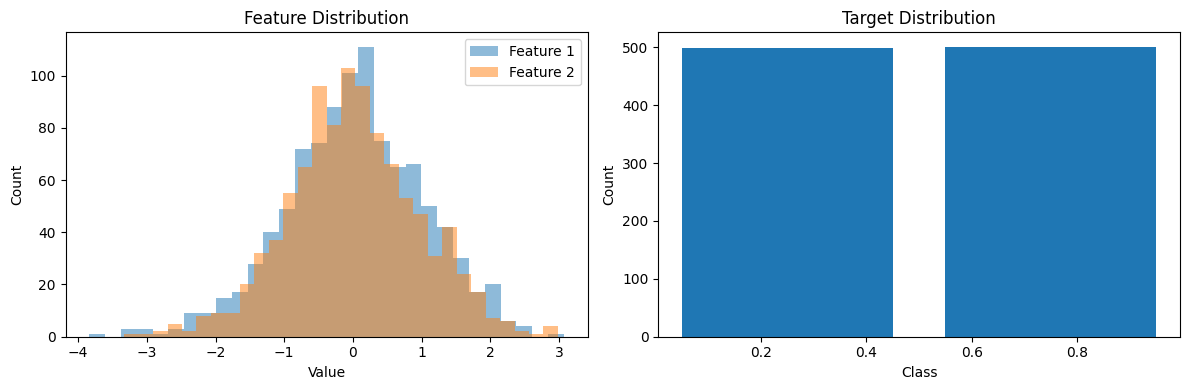

Epoch 1/100


/Users/haoyiwen/Documents/ai/2022-Machine-Learning-Specializatio/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4975 - loss: 0.7153 - val_accuracy: 0.6950 - val_loss: 0.6233
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6625 - loss: 0.6078 - val_accuracy: 0.8050 - val_loss: 0.5465
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7513 - loss: 0.5487 - val_accuracy: 0.8750 - val_loss: 0.4600
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8454 - loss: 0.4418 - val_accuracy: 0.9000 - val_loss: 0.3655
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8666 - loss: 0.3607 - val_accuracy: 0.9500 - val_loss: 0.2819
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9088 - loss: 0.2820 - val_accuracy: 0.9550 - val_loss: 0.2181
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9504 - loss: 0.2062 - val_accuracy: 0.9600 - val_loss: 0.1780
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9407 - loss: 0.1835 - val_accuracy: 0.9700 - val_loss: 0.1

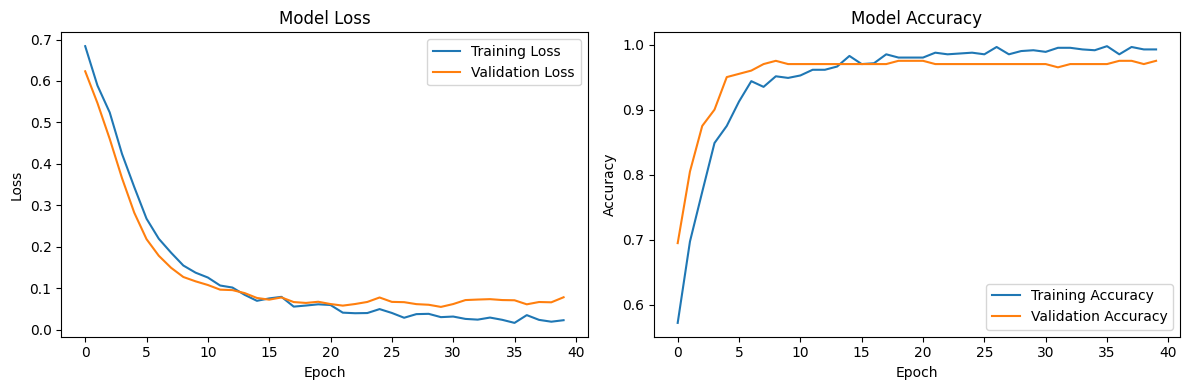


Final Results:
Training Accuracy: 1.0000
Validation Accuracy: 0.9700


In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. 生成示例数据
def generate_data(n_samples=1000):
    np.random.seed(42)
    X = np.random.normal(0, 1, (n_samples, 20))
    y = (np.sum(X[:, :5], axis=1) > 0).astype(int)  # 二分类问题
    return X, y

# 2. 创建模型
def create_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# 3. 绘制训练历史
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    # 绘制损失曲线
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # 绘制准确率曲线
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# 4. 训练数据分布可视化
def plot_data_distribution(X, y):
    plt.figure(figsize=(12, 4))
    
    # 绘制特征分布
    plt.subplot(1, 2, 1)
    plt.hist(X[:, 0], bins=30, alpha=0.5, label='Feature 1')
    plt.hist(X[:, 1], bins=30, alpha=0.5, label='Feature 2')
    plt.title('Feature Distribution')
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.legend()
    
    # 绘制目标变量分布
    plt.subplot(1, 2, 2)
    plt.hist(y, bins=2, rwidth=0.8)
    plt.title('Target Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

# 主程序
def main():
    # 生成数据
    X, y = generate_data()
    
    # 数据可视化
    plot_data_distribution(X, y)
    
    # 数据分割
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # 数据标准化
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    # 创建和训练模型
    model = create_model((X_train.shape[1],))
    
    # 添加早停机制
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )
    
    # 训练模型并记录历史
    history = model.fit(
        X_train_scaled, y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_val_scaled, y_val),
        callbacks=[early_stopping],
        verbose=1
    )
    
    # 绘制训练历史
    plot_training_history(history)
    
    # 输出最终评估结果
    final_train_loss, final_train_acc = model.evaluate(X_train_scaled, y_train, verbose=0)
    final_val_loss, final_val_acc = model.evaluate(X_val_scaled, y_val, verbose=0)
    
    print("\nFinal Results:")
    print(f"Training Accuracy: {final_train_acc:.4f}")
    print(f"Validation Accuracy: {final_val_acc:.4f}")
    
    return model, history

if __name__ == "__main__":
    model, history = main()